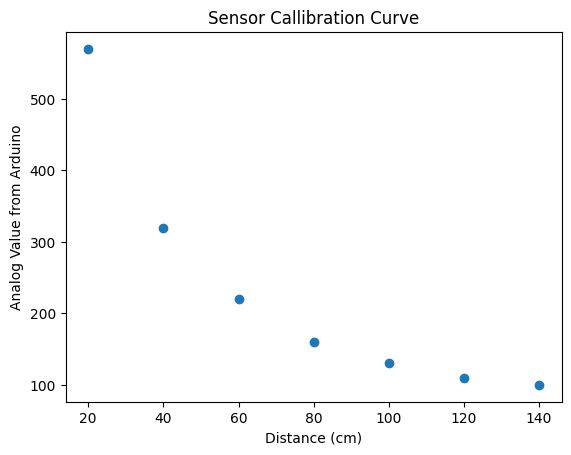

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CallibrationCurveIRSensorPie2.csv') 

plt.scatter(df['x'], df['y'])
plt.xlabel('Distance (cm)')
plt.ylabel('Analog Value from Arduino')
plt.title('Sensor Callibration Curve')
plt.show()

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('CallibrationCurveIRSensorPie2.csv')
# Fit log10 model: y = a * log10(x) + b
coeffs = np.polyfit(np.log10(df['x']), df['y'], 1)
a, b = coeffs
print(f"Fitted equation: y = {a:.2f} * log10(x) + {b:.2f}")



Fitted equation: y = -552.00 * log10(x) + 1240.13


Fitted equation: y = -552.00 * log10(x) + 1240.13


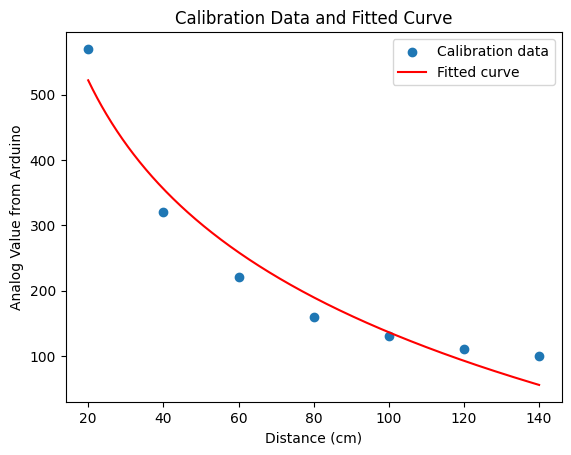

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CallibrationCurveIRSensorPie2.csv')

# Fit log10 model: y = a * log10(x) + b
coeffs = np.polyfit(np.log10(df['x']), df['y'], 1)
a, b = coeffs
print(f"Fitted equation: y = {a:.2f} * log10(x) + {b:.2f}")

# Scatter plot of calibration points
plt.scatter(df['x'], df['y'], label='Calibration data')

# Fitted curve
x_curve = np.linspace(df['x'].min(), df['x'].max(), 500)
y_curve = a * np.log10(x_curve) + b
plt.plot(x_curve, y_curve, color='red', label='Fitted curve')

plt.xlabel('Distance (cm)')
plt.ylabel('Analog Value from Arduino')
plt.title('Calibration Data and Fitted Curve')
plt.legend()
plt.show()

Min y: 0 Max y: 840


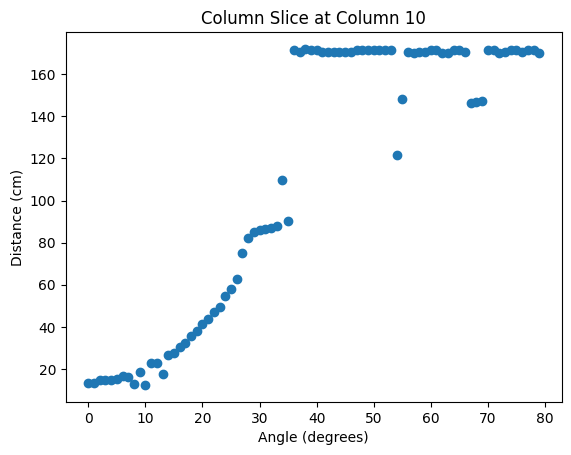

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('hex.csv', header =None)
df.iloc[0::2] = df.iloc[0::2].apply(lambda row: row[::-1], axis=1) # flips every other row it prints the opposite way
print("Min y:", df.min().min(), "Max y:", df.max().max())
df = df.clip(lower=0, upper=837)
df = 10 ** (((df) / -552) + (1240/552))

# There are some clips which is why you see it don't go past 160 
dfCol = df[10]
plt.scatter(dfCol.index, dfCol.values)  # index on x-axis, values on y-axis
plt.xlabel("Angle (degrees)")
plt.ylabel("Distance (cm)")
plt.title("Column Slice at Column 10")
plt.show()

100


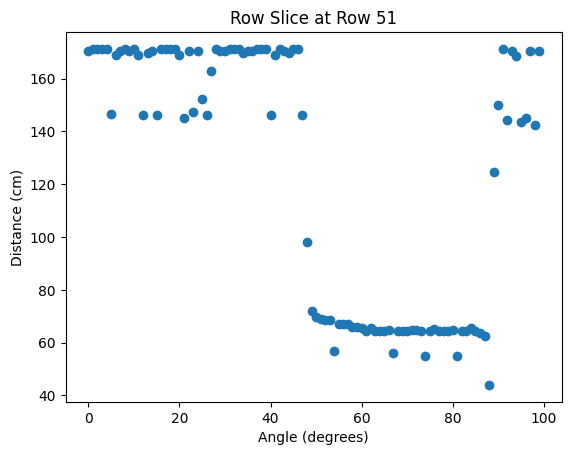

In [15]:
dfRow = df.iloc[50] 
print(len(dfRow))

# There are some clips which is why you see it don't go past 160 
plt.scatter(dfRow.index, dfRow.values)  # index on x-axis, values on y-axis
plt.xlabel("Angle (degrees)")
plt.ylabel("Distance (cm)")
plt.title("Row Slice at Row 51")
plt.show()